In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import tensorflow as tf
%matplotlib inline

In [2]:
import os
os.getcwd()

'/Users/IshaanShah/Desktop/Recipe_Finder'

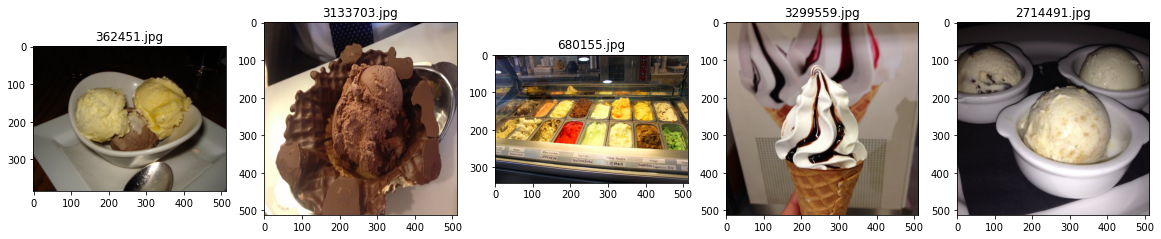

In [3]:
plt.figure(figsize=(20,20))
test_folder='/Users/IshaanShah/Desktop/Recipe_Finder/Images/food-101/food-101/images/ice_cream'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [35]:
import splitfolders
img_folder = '/Users/IshaanShah/Desktop/Recipe_Finder/Images/food-101/food-101/images'
splitfolders.ratio(img_folder, output = "output", seed = 24, ratio = (0.8,0.2), group_prefix=None) #80-20 split

Copying files: 101000 files [02:33, 657.47 files/s]


In [4]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [5]:
datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_data = datagen.flow_from_directory('/Users/IshaanShah/Desktop/Recipe_Finder/output/train',
                                        target_size= (224,224), color_mode= "rgb", batch_size = 100,
                                        class_mode= "categorical", shuffle = True, seed = 42)
test_data = datagen.flow_from_directory('/Users/IshaanShah/Desktop/Recipe_Finder/output/val',
                                        target_size= (224,224), color_mode= "rgb", batch_size = 100,
                                        class_mode= "categorical", shuffle = True, seed = 42)

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [7]:
test_it = datagen.flow_from_directory('/Users/IshaanShah/Desktop/Recipe_Finder/output/train',
                                        target_size= (224,224), color_mode= "rgb", batch_size = 1,
                                        class_mode= "categorical", shuffle = True, seed = 42)

Found 80800 images belonging to 101 classes.


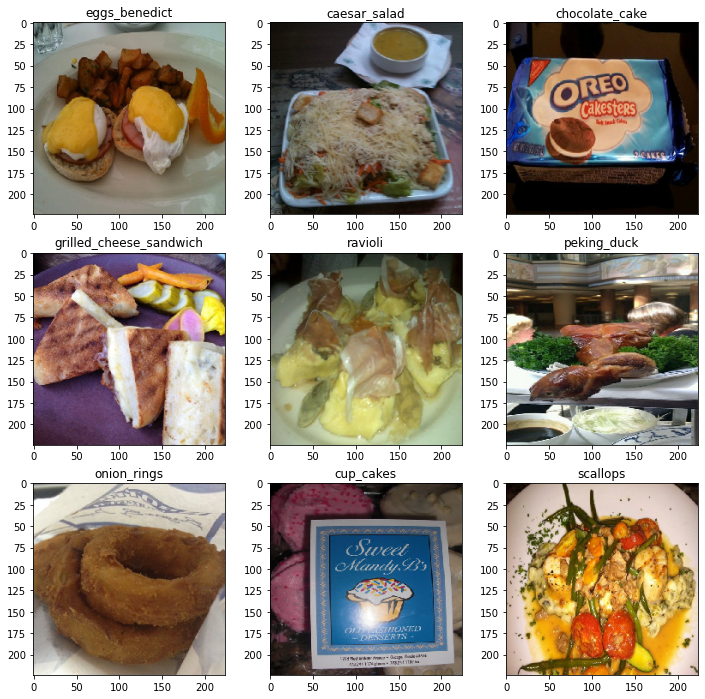

In [8]:
rows = 3
cols = 3
fig = plt.figure(figsize = (12,12))
for i in range(9):
    img, label = test_it.next()
    label_dict = test_it.class_indices
    label = list(label_dict.keys())[list(label_dict.values()).index(np.argmax(label))]
    plt.subplot(rows, cols, i+1)
    plt.title(label)  
    plt.imshow(img[0])
plt.show()

# Convolutional Neural Network
A Convolutional Neural Network or CNN can be used to extract high level representations of image content. A CNN takes the images' pixel data as input and learns how to extract features such as textures, shapes, and edges and uses it to determine what object it represents. 
## Convolution
A convolution extracts tiles of the input feature map, and applies filters to them to compute new features, producing an output feature map, or convolved feature. During a convolution, the filters (matrices the same size as the tile size) effectively slide over the input feature map's grid horizontally and vertically, one pixel at a time, extracting each corresponding tile. During training, the CNN learns the optimal values for the filter matrices that enable it to extract meaningful features from the input feature map. As the number of filters applied to the input increases, so does the number of features the CNN can extract. In order to introduce nonlinearity into the model, the CNN applies a ReLU transformation to the convolved feature. 

After ReLU comes a pooling step, in which the CNN downsamples the convolved feature to save on processing time, reducing the number of dimensions of the feature map, while still preserving the most critical feature information.

You can read more here: https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks

In [9]:
#Coding a VGG16 

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
img_input = layers.Input(shape=(224,224,3))

x = layers.Conv2D(64,3, activation= "relu", padding= "same")(img_input)
x = layers.Conv2D(64,3, activation= "relu", padding= "same")(x)
x = layers.MaxPooling2D(2, strides=2)(x)
x = layers.Conv2D(128,3, activation= "relu", padding= "same")(x)
x = layers.Conv2D(128,3, activation= "relu", padding= "same")(x)
x = layers.Conv2D(128,3, activation= "relu", padding= "same")(x)
x = layers.MaxPooling2D(2, strides=2)(x)
x = layers.Conv2D(256,3, activation= "relu", padding= "same")(x)
x = layers.Conv2D(256,3, activation= "relu", padding= "same")(x)
x = layers.Conv2D(256,3, activation= "relu", padding= "same")(x)
x = layers.MaxPooling2D(2, strides=2)(x)
x = layers.Conv2D(512,3, activation= "relu", padding= "same")(x)
x = layers.Conv2D(512,3, activation= "relu", padding= "same")(x)
x = layers.Conv2D(512,3, activation= "relu", padding= "same")(x)
x = layers.MaxPooling2D(2, strides=2)(x)
x = layers.Conv2D(512,3, activation= "relu", padding= "same")(x)
x = layers.Conv2D(512,3, activation= "relu", padding= "same")(x)
x = layers.Conv2D(512,3, activation= "relu", padding= "same")(x)
x = layers.MaxPooling2D(2, strides=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(4096, activation="relu")(x)
x = layers.Dense(4096, activation="relu")(x)
output = layers.Dense(101, activation="softmax")(x)
model_vgg16_final = Model(img_input,output)
model_vgg16_final.compile(optimizer = Adam(learning_rate = 0.001),
                   loss = keras.losses.categorical_crossentropy,
                   metrics=['accuracy'])
model_vgg16_final.summary()

2021-09-10 16:54:47.853336: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584